# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Late boarding led to a one ...
1,✅ Trip Verified | As usual the flight is delay...
2,✅ Trip Verified | I had the most fantastic BA...
3,✅ Trip Verified | Couldn’t book in online. Ar...
4,✅ Trip Verified | London Heathrow to Mumbai in...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

##Cleaning Data

In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,Late boarding led to a one hour flight leavi...
1,As usual the flight is delayed. BA try to bla...
2,I had the most fantastic BA Flight today. Th...
3,Couldn’t book in online. Arrived at check in...
4,London Heathrow to Mumbai in a Boeing 787-8 i...
...,...
995,London to Bangkok. Flew British Airways for ...
996,London Heathrow to Miami. The airport staff ...
997,London to Singapore. It was a wonderful flig...
998,Dublin to London. I was trying to add additio...


In [ ]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Late boarding led to a one hour flight leavi...,Late boarding led to a one hour flight leavin...
1,As usual the flight is delayed. BA try to bla...,As usual the flight is delayed BA try to blam...
2,I had the most fantastic BA Flight today. Th...,I had the most fantastic BA Flight today The ...
3,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...
4,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...


In [ ]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Late boarding led to a one hour flight leavi...,Late boarding led to a one hour flight leavin...,"[(Late, r), (boarding, n), (led, v), (one, Non..."
1,As usual the flight is delayed. BA try to bla...,As usual the flight is delayed BA try to blam...,"[(usual, a), (flight, n), (delayed, v), (BA, n..."
2,I had the most fantastic BA Flight today. Th...,I had the most fantastic BA Flight today The ...,"[(fantastic, a), (BA, n), (Flight, n), (today,..."
3,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,..."
4,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Late boarding led to a one hour flight leavi...,Late boarding led to a one hour flight leavin...,"[(Late, r), (boarding, n), (led, v), (one, Non...",Late boarding lead one hour flight leave two...
1,As usual the flight is delayed. BA try to bla...,As usual the flight is delayed BA try to blam...,"[(usual, a), (flight, n), (delayed, v), (BA, n...",usual flight delay BA try blame someone inab...
2,I had the most fantastic BA Flight today. Th...,I had the most fantastic BA Flight today The ...,"[(fantastic, a), (BA, n), (Flight, n), (today,...",fantastic BA Flight today cabin crew seat zo...
3,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,...",book online Arrived check find bump due over...
4,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe...",London Heathrow Mumbai Boeing Business Class...


##Sentiment Analysis using TextBlob and Vader

In [ ]:
from textblob import TextBlob

def TextBlobAnalysis(review):
    return TextBlob(review).sentiment.polarity

df['TextBlob'] = df['Lemma'].apply(TextBlobAnalysis)
df

,reviews,Cleaned Reviews,POS tagged,Lemma,TextBlob
0,Late boarding led to a one hour flight leavi...,Late boarding led to a one hour flight leavin...,"[(Late, r), (boarding, n), (led, v), (one, Non...",Late boarding lead one hour flight leave two...,-0.114137
1,As usual the flight is delayed. BA try to bla...,As usual the flight is delayed BA try to blam...,"[(usual, a), (flight, n), (delayed, v), (BA, n...",usual flight delay BA try blame someone inab...,-0.125000
2,I had the most fantastic BA Flight today. Th...,I had the most fantastic BA Flight today The ...,"[(fantastic, a), (BA, n), (Flight, n), (today,...",fantastic BA Flight today cabin crew seat zo...,0.395213
3,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,...",book online Arrived check find bump due over...,0.270000
4,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe...",London Heathrow Mumbai Boeing Business Class...,0.310755
...,...,...,...,...,...
995,London to Bangkok. Flew British Airways for ...,London to Bangkok Flew British Airways for th...,"[(London, n), (Bangkok, n), (Flew, n), (Britis...",London Bangkok Flew British Airways first ti...,0.220290
996,London Heathrow to Miami. The airport staff ...,London Heathrow to Miami The airport staff wa...,"[(London, n), (Heathrow, n), (Miami, v), (airp...",London Heathrow Miami airport staff helpful ...,0.450000
997,London to Singapore. It was a wonderful flig...,London to Singapore It was a wonderful flight...,"[(London, n), (Singapore, n), (wonderful, a), ...",London Singapore wonderful flight lucky seat...,0.688542
998,Dublin to London. I was trying to add additio...,Dublin to London I was trying to add addition...,"[(Dublin, n), (London, n), (trying, v), (add, ...",Dublin London try add additional bag online ...,0.051786


In [ ]:
!pip install -q vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Vader'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Vader'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,TextBlob,Vader,Analysis
0,Late boarding led to a one hour flight leavi...,Late boarding led to a one hour flight leavin...,"[(Late, r), (boarding, n), (led, v), (one, Non...",Late boarding lead one hour flight leave two...,-0.114137,-0.6908,Negative
1,As usual the flight is delayed. BA try to bla...,As usual the flight is delayed BA try to blam...,"[(usual, a), (flight, n), (delayed, v), (BA, n...",usual flight delay BA try blame someone inab...,-0.125000,-0.7845,Negative
2,I had the most fantastic BA Flight today. Th...,I had the most fantastic BA Flight today The ...,"[(fantastic, a), (BA, n), (Flight, n), (today,...",fantastic BA Flight today cabin crew seat zo...,0.395213,0.9947,Positive
3,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,...",book online Arrived check find bump due over...,0.270000,0.6486,Positive
4,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe...",London Heathrow Mumbai Boeing Business Class...,0.310755,0.9781,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    498
Negative    397
Neutral     105
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x78f23f6d76a0>,
 [Text(0.006911472368401293, 1.0999782868537455, 'Positive'),
  Text(-0.3628409345662793, -1.0384346181647977, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(0.003769894019127977, 0.5999881564656793, '49.8%'),
  Text(-0.19791323703615235, -0.5664188826353441, '39.7%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

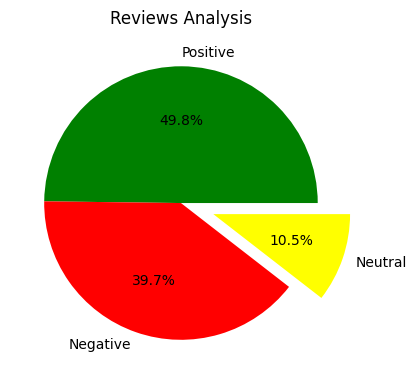

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False,
        colors=[
        'green', 'red', 'yellow'])

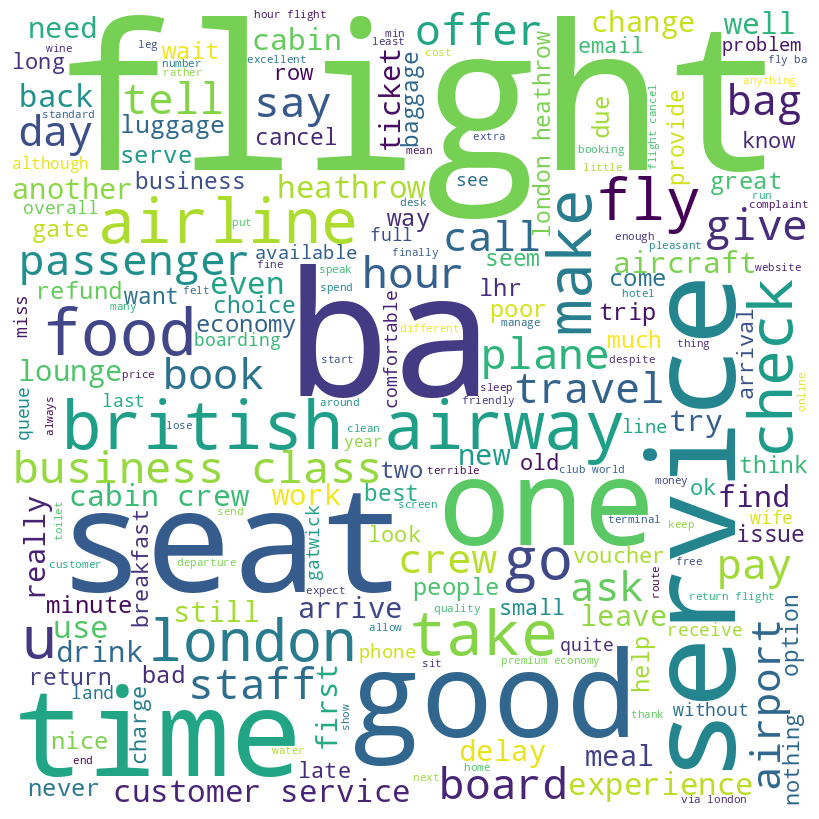

In [ ]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for r in df.Lemma:
    tokens = r.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df.to_csv("data/BA_reviews.csv")